In [77]:
class CyclicTuple:
    # permutation tuples modulo dihedral group
    def __init__(self, *args):
        self._tuple = tuple(args)
        self._len = len(self._tuple)
        assert tuple(range(self._len)) == tuple(sorted(self._tuple)), "Tuple must be a permutation"
        # store differences between elements
        self._diffs = tuple((self._tuple[i] - self._tuple[i-1]) % self._len for i in range(self._len))
    
    def __getitem__(self, key):
        return self._tuple[key % self._len]
    
    def __len__(self):
        return self._len
    
    def __repr__(self):
        return f"CyclicTuple{self._tuple}"
    
    def __hash__(self) -> int:
        # canonicalize by diffs modulo dihedral group
        # first find (diffs, negated diffs, reversed diffs, reversed negated diffs)
        diffs = self._diffs
        neg_diffs = tuple(-d % self._len for d in diffs)
        rev_diffs = tuple(reversed(diffs))
        rev_neg_diffs = tuple(reversed(neg_diffs))
        all_diffs = [diffs, neg_diffs, rev_diffs, rev_neg_diffs]
        # now cyclically rotate to find the lexicographically smallest
        min_diffs = diffs
        for i in range(self._len):
            for j in range(4):
                all_diffs[j] = tuple(all_diffs[j][-1:] + all_diffs[j][:-1])
                if all_diffs[j] < min_diffs:
                    min_diffs = all_diffs[j]
        return hash(min_diffs)

    
    def __eq__(self, other):
        return hash(self) == hash(other)

In [78]:
def legit(N, i, j):
    return (i - j) % N not in [1, N - 1]

def all_paths(path, nodes_left):
    N = len(path) + len(nodes_left)
    if len(nodes_left) == 0 and legit(N, path[0], path[-1]):
        return {CyclicTuple(*path)}
    else:
        last = path[-1]
        return set().union(*[
            all_paths(path+[node], nodes_left.difference({node}))
            for node in nodes_left if legit(N, last, node)
            ])

In [94]:
all_paths([0], {1, 2, 3, 4, 5, 6})

{CyclicTuple(0, 2, 4, 1, 6, 3, 5),
 CyclicTuple(0, 2, 4, 6, 1, 3, 5),
 CyclicTuple(0, 2, 5, 1, 3, 6, 4),
 CyclicTuple(0, 2, 5, 1, 4, 6, 3),
 CyclicTuple(0, 3, 6, 2, 5, 1, 4)}

In [100]:
for k in range(3, 15):
    print(k, len(all_paths([0], {*range(1, k)})))

3 0
4 0
5 1
6 1
7 5
8 19
9 112
10 828
11 7441
12 76579
13 871225


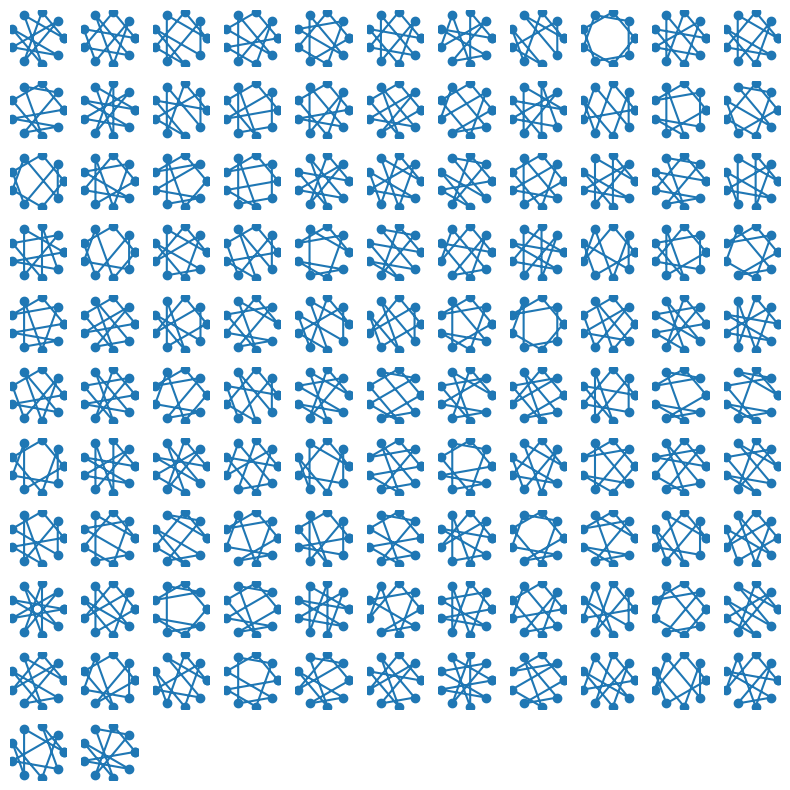

In [93]:
# draw the paths on a circle
import matplotlib.pyplot as plt
import numpy as np

def draw_paths(paths):
    # calculate the number of rows and columns for the grid
    num_plots = len(paths)
    num_cols = int(np.ceil(np.sqrt(num_plots)))
    num_rows = int(np.ceil(num_plots / num_cols))
    
    # create the grid of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    # turn off the axes for all subplots and decrease the padding
    for ax in axs.flatten():
        ax.axis('off')
    
    # iterate over the paths and plot them in the subplots
    for i, path in enumerate(paths):
        # calculate the row and column index for the current subplot
        row = i // num_cols
        col = i % num_cols
        
        # calculate the x and y coordinates for the current path
        N = len(path)
        x = [np.cos(2*np.pi*i/N) for i in path + (path[0],)]
        y = [np.sin(2*np.pi*i/N) for i in path + (path[0],)]
        
        # plot the path in the current subplot
        axs[row, col].plot(x, y)
        axs[row, col].scatter(x, y)
        axs[row, col].axis('equal')
    
    # adjust the spacing between subplots
    plt.tight_layout()
    
    # show the grid of subplots
    plt.show()

# call the modified function with the paths
paths = [path._tuple for path in all_paths([0], {*range(1, 9)})]
draw_paths(paths)
